Generate random voids (spheres) of various radii.

In [21]:
#import math

import numpy as np
import numpy.ma as ma
from numpy.random import default_rng

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#import random

import time

from sklearn import neighbors

# Generate mock survey grid

In [2]:
# Size of mock survey
N = 10 # Mpc/h

x_start, x_end = 1, N
y_start, y_end = 1, N
z_start, z_end = 1, N

# Generate grid of points
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
z = np.linspace(z_start, z_end, N)

X, Y, Z = np.meshgrid(x, y, z)

x_points = np.ravel(X)
y_points = np.ravel(Y)
z_points = np.ravel(Z)

point_coords = np.array([x_points, y_points, z_points])

# Generate fake voids

In [9]:
# Number of fake voids to generate
n_circles = 5

rng = default_rng(42)

# Generate random set of void radii
r = rng.uniform(1, 3, n_circles)

# Generate random set of void centers
circle = rng.integers(1, N, (n_circles, 3))

# Flag all grid points that are inside a void

In [11]:
start_time = time.time()

# Build a KDTree of the voids
circle_tree = neighbors.KDTree(circle)

# Query the tree for the nearest 2 neighboring voids 
# (in case a point is closer to a smaller void but inside a larger one)
dist, idx = circle_tree.query(point_coords.T, k=3)
print(point_coords.T[0], dist[0], idx[0], circle[idx[0]], r[idx[0]])

# Figure out which points are inside the voids
pts2 = dist < r[idx]
#print(pts2.shape)

pts = np.any(pts2, axis=1)
#pts = pts[:, np.newaxis]
print(pts[0])
#print(pts.shape)

print(time.time() - start_time)

[1. 1. 1.] [ 6.40312424  8.1240384  10.67707825] [3 2 4] [[5 5 4]
 [5 2 8]
 [2 9 8]] [2.39473606 2.71719584 1.1883547 ]
False
0.003236055374145508


# Create the survey mask

1 = Not a void

0 = Void

In [12]:
# Mask
M = np.ones(X.shape)

In [13]:
M[pts.reshape(X.shape)] = 0

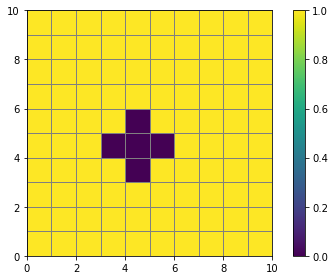

In [14]:
#M = M[:,:,0]
plt.figure(tight_layout=True)

im = plt.pcolormesh(M[:,:,1], edgecolors='gray', vmin=0, vmax=1)

ax = plt.gca()
ax.set_aspect('equal')
#ax.grid(which='minor')#, color='w', linestyle='-', linewidth=10);

plt.colorbar(im, orientation='vertical');

# Create the survey mask

Not a void = 0

Void = radius of largest void in which that point sits

In [34]:
# Mask
M = np.zeros(X.shape)

## Determine the radius of the largest void that the grid cell falls in

In [30]:
mr = ma.array(r[idx], mask=~pts2)
mr.shape

(1000, 3)

In [31]:
# Find the maximum void radius for the closest void
max_radii = ma.max(mr, axis=1)
max_radii[0]

masked

In [35]:
M[pts.reshape(X.shape)] = max_radii[pts].data

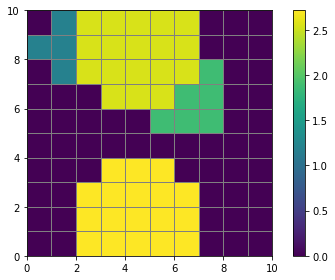

In [48]:
#M = M[:,:,0]
plt.figure(tight_layout=True)

im = plt.pcolormesh(M[:,:,7], edgecolors='gray', vmin=0)

ax = plt.gca()
ax.set_aspect('equal')
#ax.grid(which='minor')#, color='w', linestyle='-', linewidth=10);

plt.colorbar(im, orientation='vertical');